<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Librerías" data-toc-modified-id="Librerías-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Librerías</a></span></li><li><span><a href="#Cálculo-de-retornos" data-toc-modified-id="Cálculo-de-retornos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cálculo de retornos</a></span><ul class="toc-item"><li><span><a href="#Visualización-de-los-retornos-y-el-riesgo" data-toc-modified-id="Visualización-de-los-retornos-y-el-riesgo-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Visualización de los retornos y el riesgo</a></span></li></ul></li><li><span><a href="#Rentabilidad-compuesta" data-toc-modified-id="Rentabilidad-compuesta-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Rentabilidad compuesta</a></span></li><li><span><a href="#Anualización-de-los-rendimientos" data-toc-modified-id="Anualización-de-los-rendimientos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Anualización de los rendimientos</a></span></li></ul></div>

## Librerías

In [1]:
import empyrical as em
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

<hr style="height:5px;border-width:0;color:orange;background-color:orange">


## Cálculo de retornos

Los rendimientos o retornos para un tiempo $t$ to time ${t+1}$ vienen dados por la siguiente ecuación:

\begin{align}
R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} = \frac{P_{t+1}}{P_{t}} - 1
\end{align}

__Formulation__
<img src="images/multi_period_returns.png" width="400" height="200">

__Example__
<img src="images/multi_period_returns_example.png" width="400" height="200">

In [2]:
# Método 1 - numpy
prices_a = np.array([8.70, 8.91, 8.71])
print(f'Prices = {prices_a}')

np_returns = prices_a[1:]/prices_a[:-1] - 1
print(f'Returns = {np_returns}')

Prices = [8.7  8.91 8.71]
Returns = [ 0.02413793 -0.02244669]


In [3]:
# Método 2 - pandas
df_prices = pd.DataFrame({
    'BLUE': [8.70, 8.91, 8.71, 8.43, 8.73],
    'ORANGE': [10.66, 11.08, 10.71, 11.59, 12.11]
})
print('Prices',df_prices,sep='\n')
print(2*'\n')

# Método 2.1 - Slicing en pandas
df_returns = df_prices.iloc[1:].values/df_prices.iloc[:-1] - 1
print('Returns',df_returns,sep='\n')
print(2*'\n')


df_returns = df_prices.iloc[1:]/df_prices.iloc[:-1].values - 1
print('Returns',df_returns,sep='\n')
print(2*'\n')

# Método 2.2 - shift()
df_returns = df_prices/df_prices.shift(1) - 1
print('Returns',df_returns,sep='\n')
print(2*'\n')

# Método 2.3 - pct_change()
df_returns = df_prices.pct_change()
print('Returns',df_returns,sep='\n')

Prices
   BLUE  ORANGE
0  8.70   10.66
1  8.91   11.08
2  8.71   10.71
3  8.43   11.59
4  8.73   12.11



Returns
       BLUE    ORANGE
0  0.024138  0.039400
1 -0.022447 -0.033394
2 -0.032147  0.082166
3  0.035587  0.044866



Returns
       BLUE    ORANGE
1  0.024138  0.039400
2 -0.022447 -0.033394
3 -0.032147  0.082166
4  0.035587  0.044866



Returns
       BLUE    ORANGE
0       NaN       NaN
1  0.024138  0.039400
2 -0.022447 -0.033394
3 -0.032147  0.082166
4  0.035587  0.044866



Returns
       BLUE    ORANGE
0       NaN       NaN
1  0.024138  0.039400
2 -0.022447 -0.033394
3 -0.032147  0.082166
4  0.035587  0.044866


__Exercise.__

You buy a stock at the closing price on Monday. On Tuesday, the stock closes at 10% above Monday's closing price. On Wednesday, it falls and closes at 10% below Tuesday’s closing price and you sell it at that closing price. DId you have a negative, positive or zero return?

In [4]:
pct_change = pd.Series([.10, -.10])
em.cum_returns(pct_change)

0    0.10
1   -0.01
dtype: float64

### Visualización de los retornos y el riesgo

In [6]:
df_prices = pd.read_csv('../data/sample_prices.csv')
df_prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [7]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BLUE    13 non-null     float64
 1   ORANGE  13 non-null     float64
dtypes: float64(2)
memory usage: 336.0 bytes


In [8]:
# Calcular retornos con cualquiera de los métodos vistos
df_returns = df_prices.pct_change()
df_line = pd.DataFrame(index=df_returns.index)
df_line['line'] = 0

In [9]:
df_returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [10]:
s_mean = df_returns.mean()
s_mean

BLUE      0.01
ORANGE    0.01
dtype: float64

In [11]:
s_std = df_returns.std()
s_std

BLUE      0.023977
ORANGE    0.079601
dtype: float64

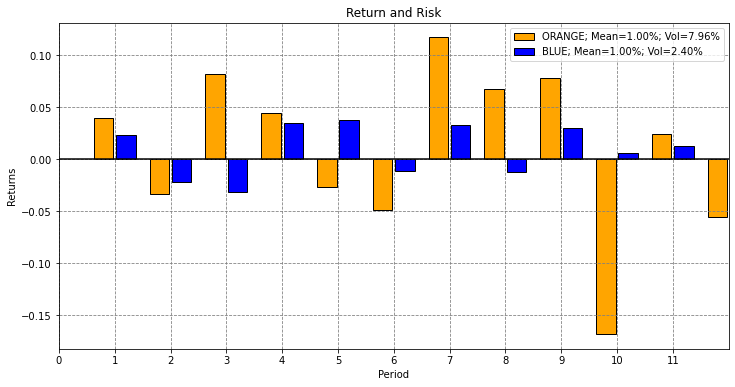

In [12]:
fig, ax = plt.subplots(figsize=(12,6))

w = 0.2
name_blue   = 'BLUE; Mean={:.2f}%; Vol={:.2f}%'.format(s_mean['BLUE']*100, s_std['BLUE']*100)
name_orange = 'ORANGE; Mean={:.2f}%; Vol={:.2f}%'.format(s_mean['ORANGE']*100, s_std['ORANGE']*100)

ax.bar(df_returns.index-w, height=df_returns['ORANGE'], width=w+.15, align='center',color='orange', label=name_orange,edgecolor ='black')
ax.bar(df_returns.index+w, height=df_returns['BLUE'],   width=w+.15, align='center',color='BLUE', label=name_blue,edgecolor ='black')
ax.plot(df_line.index, df_line['line'], color='black', label='')

_ = ax.set_title('Return and Risk')
_ = ax.set_xlim(0,df_returns.shape[0]-1)
_ = ax.legend()
_ = ax.set_xlabel('Period')
_ = ax.set_ylabel('Returns')
_ = ax.grid(color='gray', linestyle='dashed')
_ = plt.xticks(np.arange(min(df_line.index), max(df_line.index), 1.0))

__¿Qué es exactamente un rendimiento, y cómo caracterizamos los rendimientos?__

El gráfico superior muestra un conjunto de 12 rendimientos mensuales de dos activos. 
- Activo azul.
- Activo naranja. 

El activo azul es mucho menos volátil, y se puede ver que tiende a tener menos variación mientras que el activo naranja es mucho más volátil. Pero lo interesante es que ambos activos tienen exactamente el mismo rendimiento mensual del 1%, así que estamos viendo 12 rendimientos, es decir, 12 meses, y el 1% es el rendimiento medio de estos dos activos pero claramente no se están comportando igual. 

Por lo tanto, los rendimientos medios no son una buena manera de ver cómo se comporta un activo ya que la rentabilidad media puede ser bastante engañosa. 


Una forma de tratar de entender la diferencia entre ellos es observando lo que sucedería si se invirtiera en estos dos activos. Al observar el gráfico inferior, si se ubiese invertido con 1.000 dólares en estos dos activos al comienzo del año, muestra que el activo azul se mueve y lo hace bastante bien, y el activo naranja está por todas partes y no terminan en el mismo punto.

Por lo tanto, aunque la rentabilidad media mensual sea la misma, no significa que se vaya a terminar con la misma cantidad de dinero ya que al final del mes 12, tienes valores diferentes. 

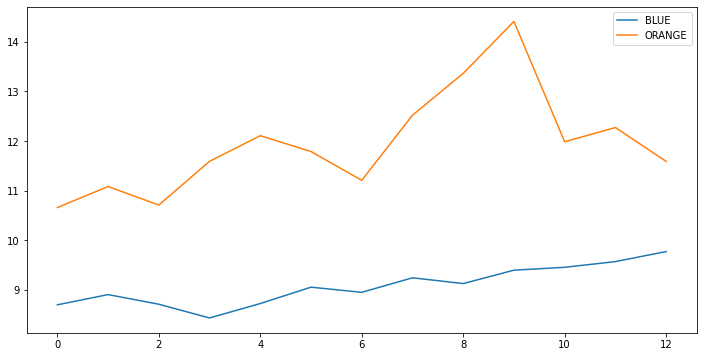

In [13]:
_ = df_prices.plot(figsize=(12,6))

<hr style="height:5px;border-width:0;color:orange;background-color:orange">


##  Rentabilidad compuesta

Ahora que tenemos una serie de 12 rentabilidades mensuales, podemos producir la rentabilidad compuesta multiplicando las rentabilidades de cada periodo, siempre que las rentabilidades se expresen como tasas de crecimiento (formato "1+R").

Para componer los rendimientos, todo lo que tenemos que hacer es añadir 1 a cada rendimiento y luego multiplicarlos. El resultado está a su vez en formato "1+R", por lo que tenemos que restar 1.


In [14]:
df_returns + 1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [15]:
# Método 1 - numpy. Formato 1+R
rend_comp = np.prod(df_returns+1)
print('Rendimientos compuestos (formato 1+R)',rend_comp,sep='\n')
print(2*'\n')

# Método 2 - pandas. Formato 1+R
rend_comp = (df_returns+1).prod()
print('Rendimientos compuestos (formato 1+R)',rend_comp,sep='\n')
print(2*'\n')

# Formato R
rend_comp = (df_returns+1).prod()-1
print('Rendimientos compuestos',rend_comp,sep='\n')
print(2*'\n')

# Formato R
rend_comp = (((df_returns+1).prod()-1)*100).round(2)
print('Rendimientos compuestos',rend_comp,sep='\n')

Rendimientos compuestos (formato 1+R)
BLUE      1.123310
ORANGE    1.087167
dtype: float64



Rendimientos compuestos (formato 1+R)
BLUE      1.123310
ORANGE    1.087167
dtype: float64



Rendimientos compuestos
BLUE      0.123310
ORANGE    0.087167
dtype: float64



Rendimientos compuestos
BLUE      12.33
ORANGE     8.72
dtype: float64


<hr style="height:5px;border-width:0;color:orange;background-color:orange">


## Anualización de los rendimientos

Para anualizar la rentabilidad de un periodo, se compone la rentabilidad tantas veces como periodos tenga el año. 

__Example.__

<img src="images/annualizing returns.png" width="400" height="200">

__Ejemplos.__
- Para anualizar una rentabilidad mensual se compone esa rentabilidad 12 veces. La fórmula para anualizar una rentabilidad mensual 𝑅𝑚 es:

\begin{align}
(1+R_{m})^{12} - 1
\end{align}

- Para anualizar una rentabilidad trimestral 𝑅𝑞 la formula es:

\begin{align}
(1+R_{m})^{4} - 1
\end{align}

- Para anualizar una rentabilidad diaria 𝑅𝑑 la formula es:

\begin{align}
(1+R_{m})^{252} - 1
\end{align}


In [16]:
rm = 0.01

rent_ann = (1+rm)**12 - 1
print('Rentabilidad anual con {:.0f}% mensual: {:.2f}%'.format(rm*100, rent_ann*100))

Rentabilidad anual con 1% mensual: 12.68%


In [17]:
rm = 0.01

rent_ann = (1+rm)**4 - 1
print('Rentabilidad anual con {:.0f}% trimestral: {:.2f}%'.format(rm*100, rent_ann*100))

Rentabilidad anual con 1% trimestral: 4.06%


__Exercise.__

A stock gains 1% over a quarter (i.e. a 3 month period). What is it’s annualized return?


In [18]:
periodos_anuales = 12/3
rm = 0.01
annualized_return = (pow((1+rm),periodos_anuales)-1)
print('Annualized return is {:.2f}%'.format(annualized_return*100))

Annualized return is 4.06%
